# Example of a TiO2/SiO2 Bragg mirror with 8.5 periods

Author: O. Castany, M.Müller

In [1]:
import elli
import elli.plot.structure as elliplot
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(suppress=True, precision=3)

## Front and back materials

In [3]:
air = elli.AIR
glass = elli.ConstantRefractiveIndex(1.5).get_mat()

## Materials for a SiO2/TiO2 Bragg mirror

In [4]:
n_SiO2 = 1.47
n_TiO2 = 2.23 + 1j * 5.2e-4

SiO2 = elli.ConstantRefractiveIndex(n_SiO2).get_mat()
TiO2 = elli.ConstantRefractiveIndex(n_TiO2).get_mat()

## Calculate layer thickness as quarterwaveplates

In [5]:
lbda0 = 1550

d_SiO2 = elli.get_qwp_thickness(SiO2, lbda0)
d_TiO2 = elli.get_qwp_thickness(TiO2, lbda0)

print("Thickness of the SiO2 QWP: {} nm".format(d_SiO2))
print("Thickness of the TiO2 QWP: {} nm".format(d_TiO2))

Thickness of the SiO2 QWP: 263.6054421768708 nm
Thickness of the TiO2 QWP: 173.76681614349775 nm


## Create layers and structure

In [6]:
L_SiO2 = elli.Layer(SiO2, d_SiO2)
L_TiO2 = elli.Layer(TiO2, d_TiO2)

# Repeated layers: 8.5 periods
Layerstack = elli.RepeatedLayers([L_TiO2, L_SiO2], 8, 0, 1)

s = elli.Structure(air, [Layerstack], glass)

## Calculation

In [7]:
(lbda1, lbda2) = (1100, 2500)
lbda_list = np.linspace(lbda1, lbda2, 200)

data = s.evaluate(lbda_list, 0)

R = data.R_ss
T = data.T_ss

## Plotting

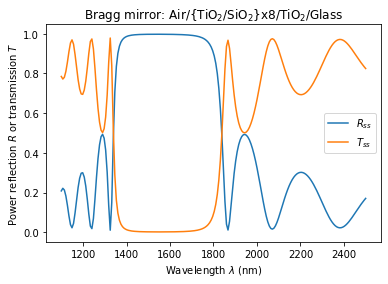

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(lbda_list, R, label="$R_{ss}$")
ax.plot(lbda_list, T, label="$T_{ss}$")
ax.legend(loc="center right")
ax.set_xlabel(r"Wavelength $\lambda$ (nm)")
ax.set_ylabel(r"Power reflection $R$ or transmission $T$")
ax.set_title(r"Bragg mirror: Air/{TiO$_2$/SiO$_2$}x8/TiO$_2$/Glass")
plt.show()

## Structure Graph

<AxesSubplot:xlabel='z (nm)', ylabel="n'">

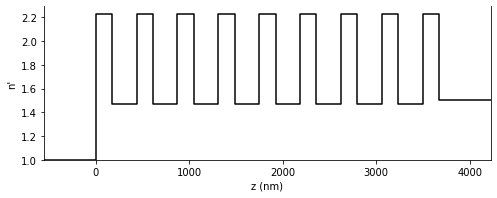

In [9]:
elliplot.draw_structure(s)